# Central Limit Theorem

The more independent random variables you sum together, the closer than sum will be to a normal distribution!

In [1]:
# # coin flip
# outcomes=  [0, 1]
# prob = [.5, .5]

# die roll
outcomes = [ 1, 2, 3, 4, 5, 6]
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# # lopsided distribution
# outcomes = [0, 1, 10]
# prob = [.49, .49, .02]

# or build your own ...

# Goal: sum `n` independent samples

In [2]:
import numpy as np
n = 3

# get size independent outcomes
one_outcome = np.random.choice(outcomes, size=n, p=prob)
one_outcome

array([3, 4, 1])

In [3]:
# add it together
one_outcome.sum()

8

# Goal: (sum `n` independent samples) `a_bunch` of times and plot results

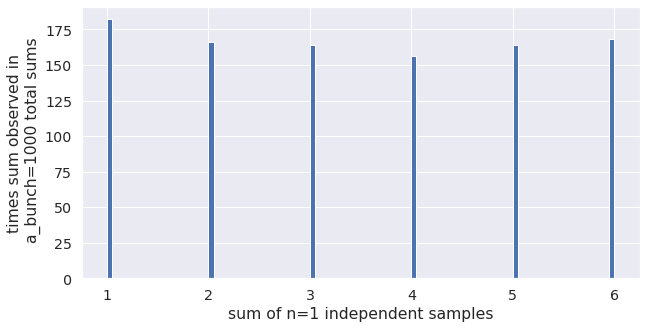

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

n = 1
a_bunch = 1000

a_bunch_outcomes = np.random.choice(outcomes, size=(a_bunch, n), p=prob).sum(axis=1)

sns.set(font_scale=1.3)
plt.hist(a_bunch_outcomes, bins=100)
plt.gcf().set_size_inches(10, 5)
plt.xlabel(f'sum of n={n} independent samples')
plt.ylabel(f'times sum observed in\n a_bunch={a_bunch} total sums');

# Looks awfully 'normal', doesn't it?
We can even compute the mean and variance of that distribution (linearity of expectation formulae!)

In [5]:
mean_1_sample = np.dot(outcomes, prob)
var_1_sample = np.dot(np.array(outcomes) ** 2, prob) - mean_1_sample ** 2

mean_n_sample = mean_1_sample * n
var_n_sample = var_1_sample * n

print(f'mean of sum of n samples: {mean_n_sample:.3f}')
print(f'var of sum of n samples: {var_n_sample:.3f}')

mean of sum of n samples: 3.500
var of sum of n samples: 2.917


mean of sum of n samples: 350.000
var of sum of n samples: 291.667


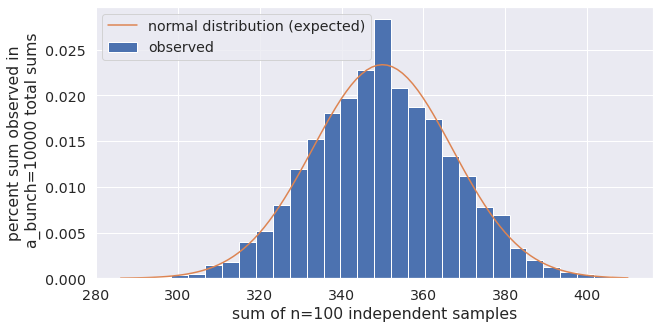

In [7]:
from scipy.stats import norm

n = 100
a_bunch = 10000


mean_1_sample = np.dot(outcomes, prob)
var_1_sample = np.dot(np.array(outcomes) ** 2, prob) - mean_1_sample ** 2

mean_n_sample = mean_1_sample * n
var_n_sample = var_1_sample * n

print(f'mean of sum of n samples: {mean_n_sample:.3f}')
print(f'var of sum of n samples: {var_n_sample:.3f}')

# sample and sum outcomes
a_bunch_outcomes = np.random.choice(outcomes, size=(a_bunch, n), p=prob).sum(axis=1)

# plot samples
sns.set(font_scale=1.3)
plt.hist(a_bunch_outcomes, density=True, bins=30, label='observed')
plt.gcf().set_size_inches(10, 5)
plt.xlabel(f'sum of n={n} independent samples')
plt.ylabel(f'percent sum observed in\n a_bunch={a_bunch} total sums')

# plot pdf
x = np.linspace(a_bunch_outcomes.min(), a_bunch_outcomes.max(), 100)
pdf = norm.pdf(x, loc=mean_n_sample, scale=var_n_sample**.5)

# groom pdf
plt.plot(x, pdf, label='normal distribution (expected)')
plt.legend()

## Closing Thoughts:

The CLT is why the normal distribution is so common.  Many experiments can be described as the sum of independent random variables!

Note that each of independent random variables are identically distributed here, but the CLT holds even when variables have different distributions too!

How cool is that?!